In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.metrics import accuracy_score
df=pd.read_csv("/content/dataJobs.csv")
df=df.dropna()
job_descriptions = df["job-description"].tolist()
job_titles = df["job-title"].tolist()
X_train, X_test, y_train, y_test = train_test_split(job_descriptions, job_titles, test_size=0.2, random_state=42)
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test=cv.transform(X_test)


In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)

Accuracy: 0.8297872340425532


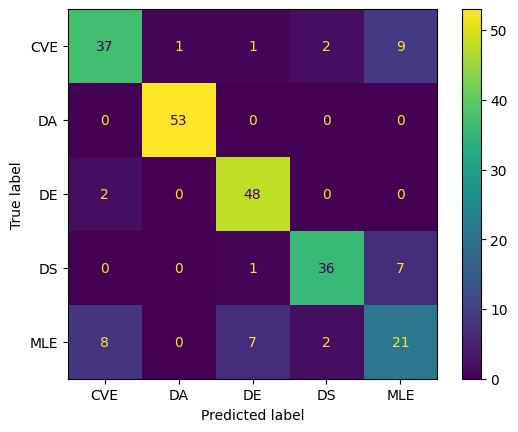

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["CVE","DA","DE","DS","MLE"])
disp.plot()
plt.show()

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)

Accuracy: 0.8468085106382979


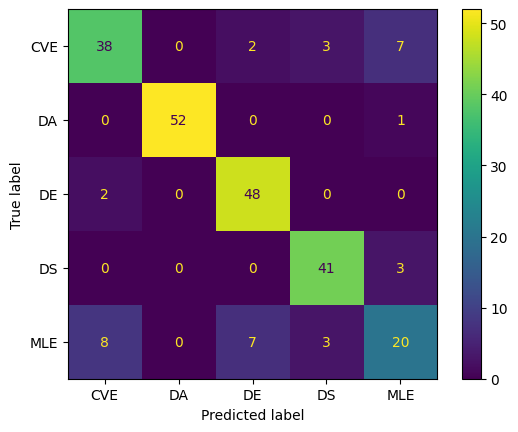

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_gb, labels=gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["CVE","DA","DE","DS","MLE"])
disp.plot()
plt.show()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.8765957446808511


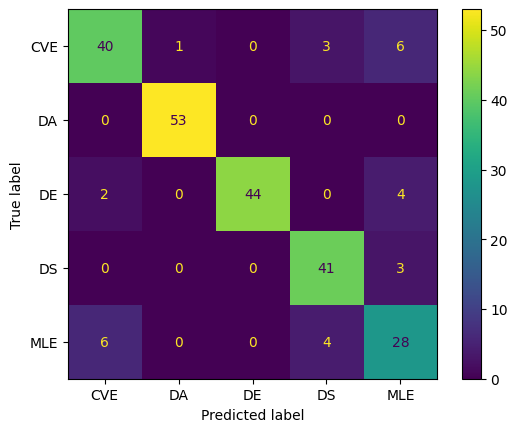

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["CVE","DA","DE","DS","MLE"])
disp.plot()
plt.show()

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler(with_mean=False)
#X_train=sc.fit_transform(X_train)
lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

Accuracy: 0.8638297872340426


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


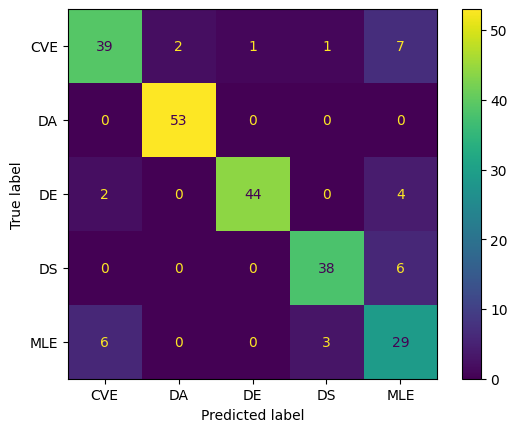

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["CVE","DA","DE","DS","MLE"])
disp.plot()
plt.show()

In [ ]:
svm = LinearSVC(max_iter=2000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

Accuracy: 0.8468085106382979


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


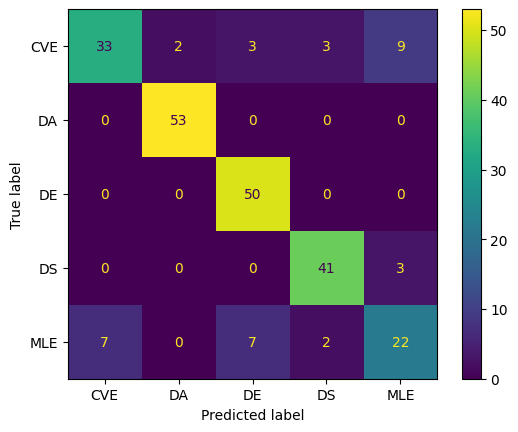

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_svm, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["CVE","DA","DE","DS","MLE"])
disp.plot()
plt.show()

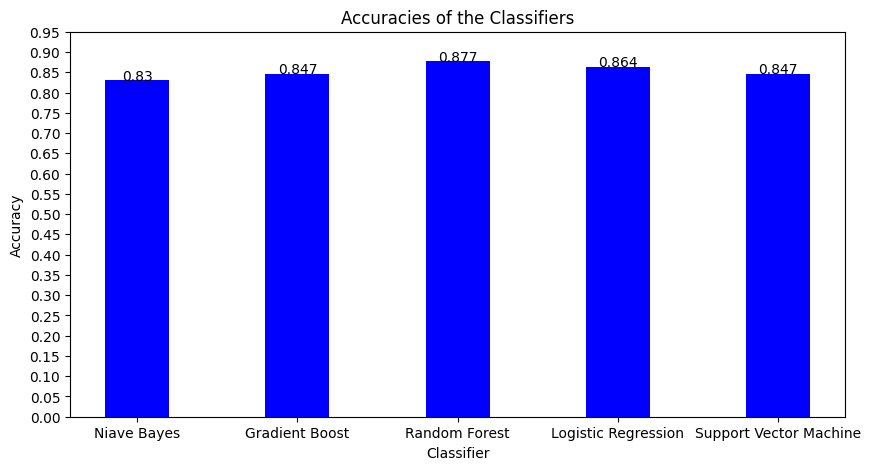

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (10, 5))
x=["Niave Bayes","Gradient Boost","Random Forest","Logistic Regression","Support Vector Machine"]
y=[accuracy_nb,accuracy_gb,accuracy_rf,accuracy_lr,accuracy_svm]
# creating the bar plot
plt.bar(x, y, color ='blue',
        width = 0.4)
plt.yticks(np.arange(0, 1, step=0.05))
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracies of the Classifiers")
for i in range(len(x)):
     plt.text(i, y[i], round(y[i],3), ha = 'center')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from statistics import mean
similarity={}
resume_text= "PROFESSIONAL EXPERIENCE Universiti Teknologi PETRONAS, Perak, Malaysia June 2021 - March 2022 Research Intern (Data Science) - Python, Pandas, NumPy, Scikit-learn, TensorFlow, TF-Lite, Keras, RPi. • Designed a novel Artificial Neural Network (ANN) architecture to fabricate a Motor Bearing Non-Invasive Fault Testing Rig (MOBIT) which improves plant efficiency by 25% and decreases replacement costs by over 35%.• Fabricated a computationally light image classification algorithm to analyze Park Vector images of IM motors.• Researched with real-world induction motor data provided by Petronas, to implement predictive maintenance in industrial plants. Achieved 98.7% accuracy in fault prediction and deployed predictive model in RPi. Biosthra, Chennai, India March 2021 - December 2021 IoT Engineer and Data Analyst - Flutter, Python, Pandas, NumPy TensorFlow, Keras, Time Series, DoE.• Architected the IoT system of an automated compost pit to monitor key parameters such as pH values and temperature.• Enabled visualization of all key metrics in a live mobile dashboard using ThingSpeak. Further, built the framework tocontrol working of the compost pit via a custom flutter application, thus reducing compost time by 33%.• Developed a machine learning algorithm to predict heat produced by the compost pit at different time stamps, compostconsistencies and reduce its reliance on sensors which are bound to fail in hostile conditions.Saint Louis University, St. Louis, Missouri (Virtual) October 2021 - November 2021 Data Analyst intern - Tableau, R (Rshiny), MS Office suite.• Analyzed real-world data from client industry Ad-campaigns to decide upon the best performers.• Took charge as intern project lead and orchestrated working of the team in visualization of important metrics.• Undertook responsibility to present conclusions and visualizations from the trained model."
jobs=["CVE","DA","DE","DS","MLE"]
for job in jobs:
  df=pd.read_csv('/content/linkedinjobs'+job+'.csv')
  df=df.dropna()
  sim=[]
  for x in df["job-description"].tolist():
    job_description =x
    data = pd.DataFrame({'text': [resume_text, job_description]})
    vectorizer = CountVectorizer().fit_transform(data['text'])
    cos_sim = cosine_similarity(vectorizer[0], vectorizer[1])[0][0]
    sim.append(cos_sim)
    print("The cosine similarity score between the resume and job description is:", cos_sim)
  similarity[job]=mean(sim)


The cosine similarity score between the resume and job description is: 0.39858739994341824
The cosine similarity score between the resume and job description is: 0.42202512485434424
The cosine similarity score between the resume and job description is: 0.5003790978018228
The cosine similarity score between the resume and job description is: 0.4705807125986845
The cosine similarity score between the resume and job description is: 0.463019727476313
The cosine similarity score between the resume and job description is: 0.4398054376891351
The cosine similarity score between the resume and job description is: 0.45223376886555644
The cosine similarity score between the resume and job description is: 0.4698388262507255
The cosine similarity score between the resume and job description is: 0.35834468731623315
The cosine similarity score between the resume and job description is: 0.13655289896181635
The cosine similarity score between the resume and job description is: 0.4154786799185604
The co

In [ ]:
similarity

{'CVE': 0.466225762491494,
 'DA': 0.4799135645044779,
 'DE': 0.47239386795199606,
 'DS': 0.46118747809029575,
 'MLE': 0.43631016998630634}

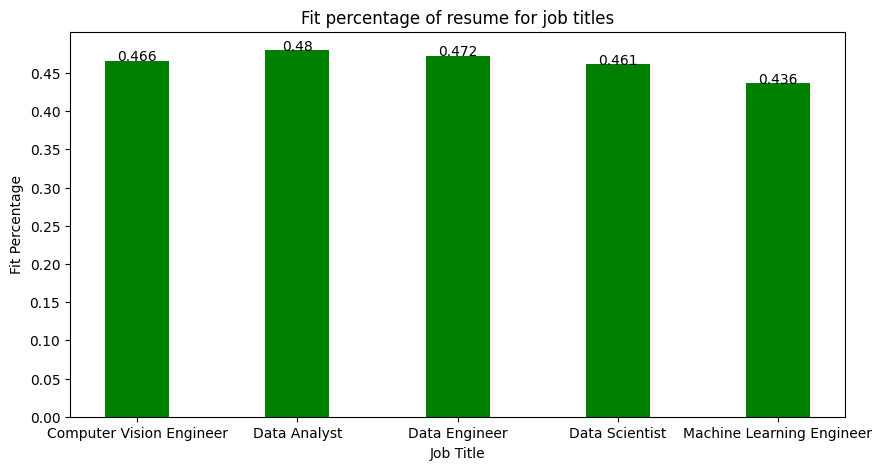

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (10, 5))
x=["Computer Vision Engineer","Data Analyst","Data Engineer","Data Scientist","Machine Learning Engineer"]
y=list(similarity.values())
# creating the bar plot
plt.bar(x, y, color ='green',
        width = 0.4)
plt.yticks(np.arange(0, 0.5, step=0.05))
plt.xlabel("Job Title")
plt.ylabel("Fit Percentage")
plt.title("Fit percentage of resume for job titles")
for i in range(len(x)):
     plt.text(i, y[i], round(y[i],3), ha = 'center')
plt.show()